In [30]:
import numpy as np
import astropy
import healpy as hp
import pandas as pd

In [73]:
df = pd.read_csv('../bricks_data/galaxy_catalogue_sample.csv')

print(len(df.BrickID.unique()))

print(df.shape)
print(df.head())


duplicates_removed = df.drop_duplicates()

duplicates_removed.to_csv('../bricks_data/galaxy_catalogue_sample.csv', index=False)

df = duplicates_removed

# Setting NSIDE values
NSIDE = 256
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

1036
(379416, 6)
   BrickID  ObjectID          RA        DEC  South  Target_type
0   389675        10  133.284363  10.315927   True            3
1   389675        11  133.284832  10.314327   True            2
2   389675        15  133.285109  10.294865   True            3
3   389675        21  133.285731  10.319199   True            3
4   389675        35  133.286350  10.168023   True            2
Approximate resolution at NSIDE 256 is 0.23 deg


### Density Estimate for LRG

Number of LRGs in Sample: 41904
Mean LRGs per Pixel: 9.93692198245198


/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


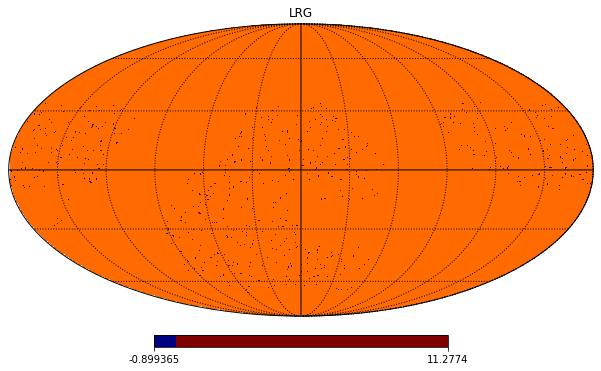

In [74]:
df_LRG = df[df["Target_type"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)

print("Number of LRGs in Sample:", len(ra_LRG))

m_LRG = np.zeros(NPIX)
LRG_pixel_indices = hp.ang2pix(NSIDE, ra_LRG, dec_LRG, lonlat=True)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block
density_LRG = (counts / mean_LRG) - 1

m_LRG[unique] = density_LRG
hp.mollview(m_LRG, title="LRG", norm="hist",cmap="jet")
hp.graticule()



### Density Estimate for ELG


Number of ELG in Sample: 157118
Mean ELG per Pixel: 32.556568586821385


/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


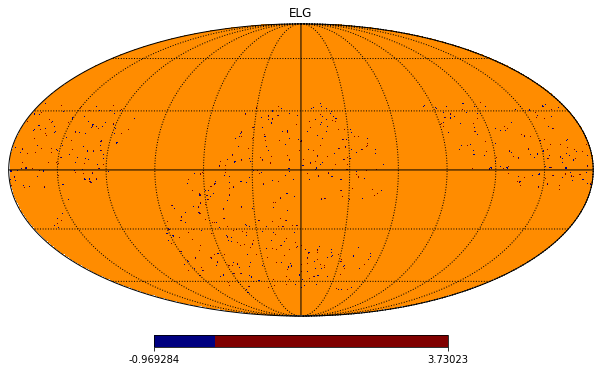

In [75]:

df_ELG = df[df["Target_type"] == 2]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)

print("Number of ELG in Sample:", len(ra_ELG))

m_ELG = np.zeros(NPIX)
ELG_pixel_indices = hp.ang2pix(NSIDE, ra_ELG, dec_ELG, lonlat=True)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)

mean_ELG = counts.mean()
print("Mean ELG per Pixel:", mean_ELG)

# Calculating Densities for every block
density_ELG = (counts / mean_ELG) - 1

m_ELG[unique] = density_ELG
hp.mollview(m_ELG, title="ELG", norm="hist",cmap="jet")
hp.graticule()





### Density Estimate for QSO


Number of QSO in Sample: 180394
Mean QSO per Pixel: 36.92058943921408


/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


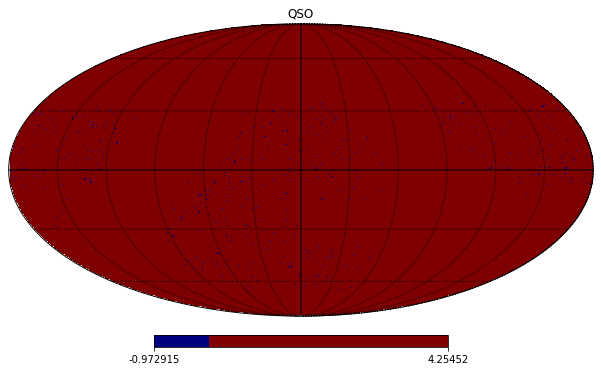

In [76]:

df_QSO = df[df["Target_type"] == 3]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)

print("Number of QSO in Sample:", len(ra_QSO))

m_QSO = np.zeros(NPIX)
QSO_pixel_indices = hp.ang2pix(NSIDE, ra_QSO, dec_QSO, lonlat=True)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

mean_QSO = counts.mean()
print("Mean QSO per Pixel:", mean_QSO)

# Calculating Densities for every block
density_QSO = (counts / mean_QSO) - 1

m_QSO[unique] = density_QSO
hp.mollview(m_QSO, title="QSO", norm="hist",cmap="jet")
hp.graticule()